<a href="https://colab.research.google.com/github/JamieMartin3/Part-II-Physics-Simulations/blob/main/Problem_3_2D_Ising_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Core Task 1 (part 1):

Simulating the Ising model using the Metropolis-Hastings method, with no interaction bewteen the spins for a single value of beta * mu * H and plotting the matrix for various numbers of iterations, ranging from 0 to 100,000, plotting every factor of 10.

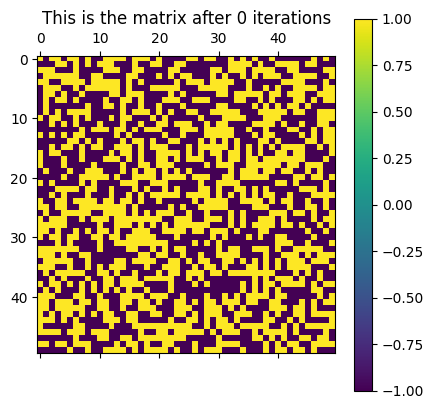

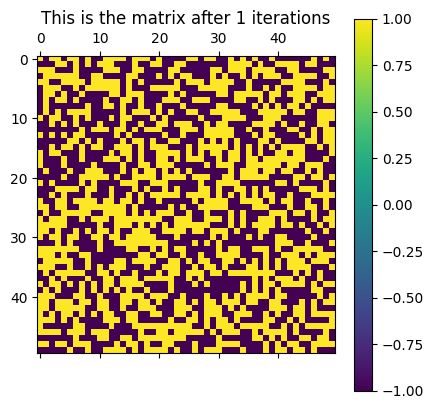

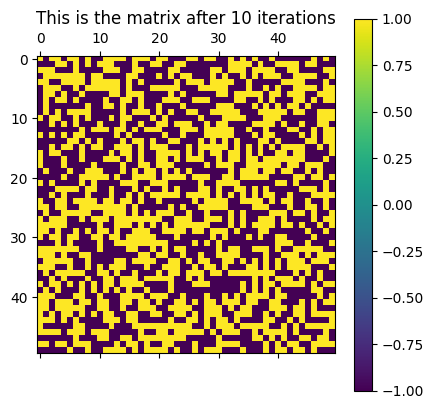

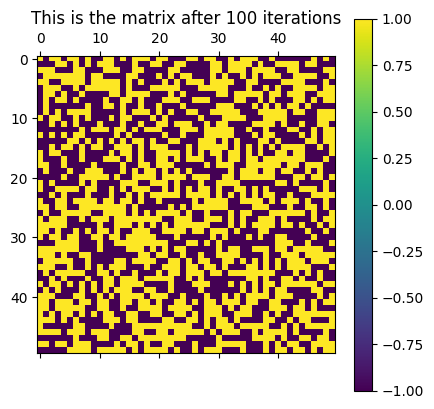

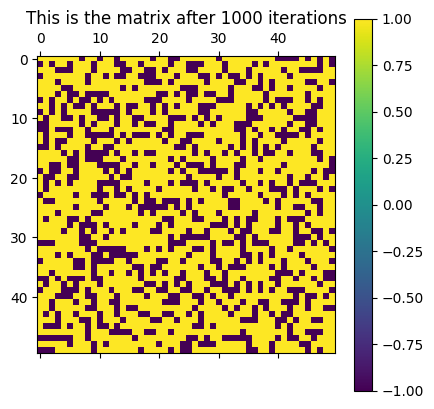

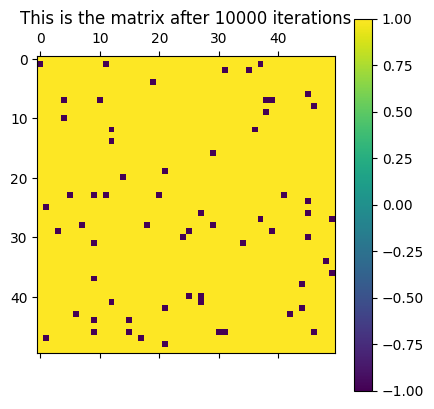

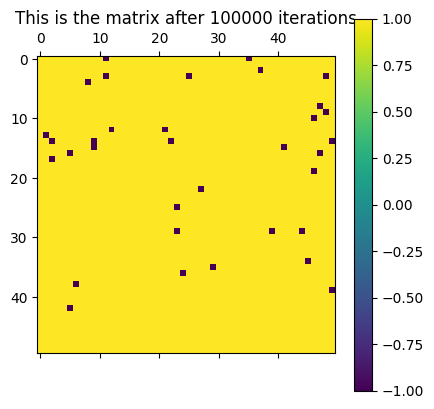

Beta*mu*H is 2.0936138180287918


Text(0.5, 1.0, 'Magnetisation against number of iterations')

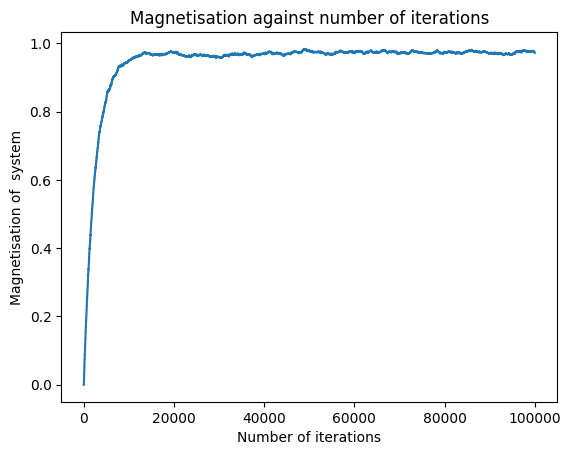

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Defining physical quantities
T = 273  # Temperature in Kelvin
beta = 1 / (1.381e-23 * T)  # Calculating beta from temperature
Magnetisation = []  # List to store magnetisation values after each iteration
numbers = [i for i in range(100001)]  # Iteration numbers for plotting
beta_mu_H = random.uniform(-3, 3)  # Randomly selecting a value for beta_mu_H within range

# Function to calculate the change in energy if a lattice point's spin is flipped
def energy_calc(lattice, x, y, beta_mu_H):
  # Initial energy of the spin at (x, y)
  energy_start = -beta_mu_H / beta * lattice[x, y]
  # Energy if the spin at (x, y) were flipped
  energy_changed = -beta_mu_H / beta * -lattice[x, y]
  # Change in energy due to flipping the spin
  delta_energy = energy_changed - energy_start
  return delta_energy

# Function to calculate the probability of a spin flip at temperature T
def probability(change_in_energy):
  prob = np.exp(-change_in_energy * beta)
  return prob

# Function to calculate the total magnetisation of the lattice
def magnetisation_calc(lattice):
    M = np.sum(lattice) / (num_rows * num_columns)
    return M

# Metropolis algorithm to decide whether to flip a spin at position (i, j)
def metropolis(lattice, beta_mu_H):
    # Randomly select a lattice point
    i, j = random.randint(0, num_rows - 1), random.randint(0, num_columns - 1)
    # Calculate change in energy for flipping the spin
    delta_energy = energy_calc(lattice, i, j, beta_mu_H)
    # Flip the spin if energy is lowered or probabilistically if energy increases
    if delta_energy < 0 or random.random() < probability(delta_energy):
        lattice[i, j] = -lattice[i, j]
    return lattice

# Define lattice parameters for a square lattice simulation
w = 50  # Width and height of the lattice
num_rows = w
num_columns = w

# Generate an initial square lattice of random spins (1's and -1's)
lattice = np.random.choice([-1, 1], size=(num_rows, num_columns))
# Initial magnetisation calculation
Magnetisation.append(magnetisation_calc(lattice))

# Display the initial lattice configuration
plt.matshow(lattice)
plt.colorbar()
plt.title("This is the matrix after 0 iterations")
plt.show()

# Main simulation loop: Iterate the Metropolis-Hastings algorithm
for _ in range(100000):
    k = _ + 1
    metropolis(lattice, beta_mu_H)
    # Calculate and record the magnetisation after each iteration
    Magnetisation.append(magnetisation_calc(lattice))
    # Display lattice at specific logarithmic iteration intervals
    if np.log10(k) == int(np.log10(k)):
        plt.matshow(lattice)
        plt.colorbar()
        plt.title(f"This is the matrix after {k} iteration(s)")
        plt.show()

# Output the selected beta_mu_H value for reference
print(f'Beta*mu*H is {beta_mu_H}')
# Plot magnetisation as a function of the number of iterations
plt.plot(numbers, Magnetisation)
plt.xlabel("Number of iterations")
plt.ylabel("Magnetisation of the system")
plt.title("Magnetisation against number of iterations")

This shows the matrix after various number of iterations of the Metropolis-Hastings method, and it shows that it can take a surprising number of iterations for the magnetisation to stabilise.

# Core Task 1 (part 2):

This does the same thing as the last code, except it does it for various values of beta * mu * H between -3 and 3 and plots the measured magnetisation against beta * mu * H, as well as the theoretical solution.

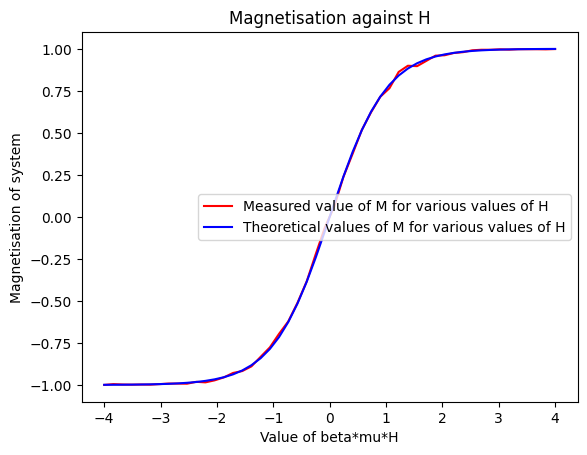

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the size of the square lattice.
w = 50  # The lattice is a w x w matrix.

# Define the number of rows and columns in the lattice, matching the lattice size.
num_rows = w
num_columns = w

# Define physical quantities for the simulation.
T = 273  # Temperature in Kelvin.
beta = 1 / (1.381e-23 * T)  # Inverse thermal energy, calculated using Boltzmann's constant.

# Initialize an empty list to store the average magnetization for different values of beta*mu*H.
average_magnetisation = []

# Generate an array of beta*mu*H values to simulate the effect of varying magnetic field strength.
beta_mu_H_values = np.linspace(-4, 4, 50)

# Function to calculate the change in energy if the spin at (x, y) is flipped.
def energy_calc(lattice, x, y, beta_mu_H):
    energy_start = -beta_mu_H / beta * lattice[x, y]
    delta_energy = -2 * energy_start  # Change in energy due to flipping the spin.
    return delta_energy

# Function to calculate the probability of flipping a spin, given the change in energy.
def probability(change_in_energy, beta):
    prob = np.exp(-change_in_energy * beta)  # Boltzmann factor.
    return prob

# Function to calculate the total magnetization of the lattice.
def magnetisation_calc(lattice):
    M = np.sum(lattice) / (num_rows * num_columns)  # Average magnetization.
    return M

# Metropolis algorithm to decide whether to flip a spin at a random position.
def metropolis(lattice, beta_mu_H):
    i, j = random.randint(0, num_rows - 1), random.randint(0, num_columns - 1)
    delta_energy = energy_calc(lattice, i, j, beta_mu_H)
    # Flip the spin if the energy decreases or probabilistically if it increases.
    if delta_energy < 0 or random.random() < probability(delta_energy, beta):
        lattice[i, j] = -lattice[i, j]
    return lattice

# Main simulation loop over different values of beta*mu*H.
for beta_mu_H in beta_mu_H_values:
    lattice = np.random.choice([-1, 1], size=(num_rows, num_columns))  # Initialize lattice with random spins.
    Magnetisation = []  # Temporary list to store magnetization values for each beta*mu*H.
    for _ in range(30000):
        metropolis(lattice, beta_mu_H)  # Run Metropolis algorithm.
    if _ > 20000:
        Magnetisation.append(magnetisation_calc(lattice))  # Calculate final magnetization.
    average_magnetisation.append(Magnetisation)  # Store the average magnetization.

# Plotting the results.
plt.plot(beta_mu_H_values, average_magnetisation, linestyle='-', color="red", label="Measured value of M for various values of H")
plt.plot(beta_mu_H_values, np.tanh(beta_mu_H_values), color="blue", label="Theoretical values of M for various values of H")
plt.xlabel("Value of beta*mu*H")
plt.ylabel("Magnetisation of system")
plt.title("Magnetisation against H")
plt.legend()
plt.show()

This shows the the theoretical solution is correct, as they are both approximately the same graph

# Core Task 2:

Simulating the Ising model, using the Metropolis-Hasting method, with spin interaction and no external field this time, plotting the measured values of magnetisation against Temperture, as well as the theoretical solution.

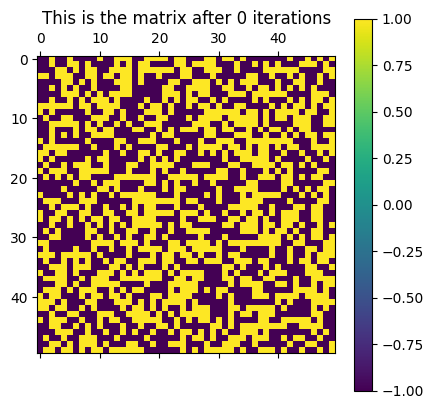

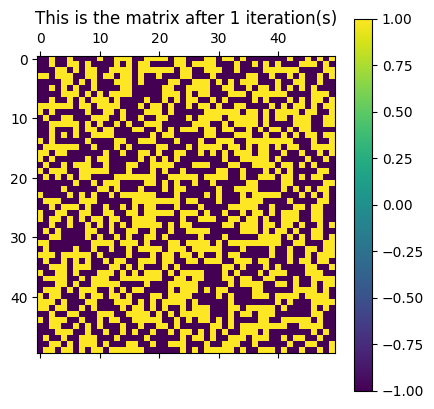

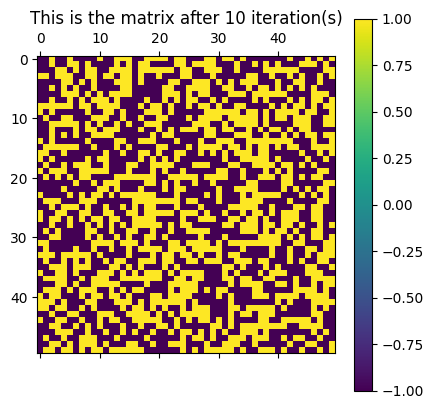

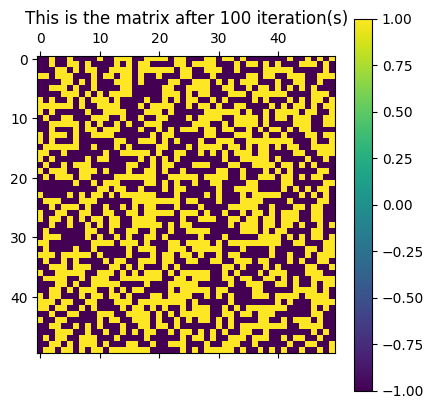

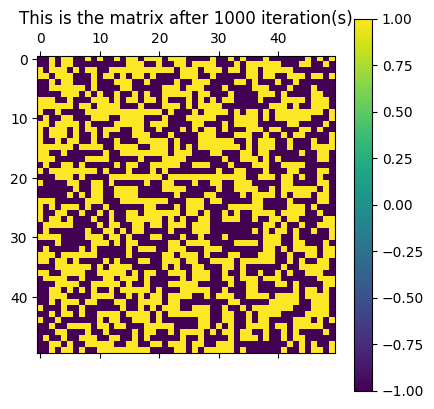

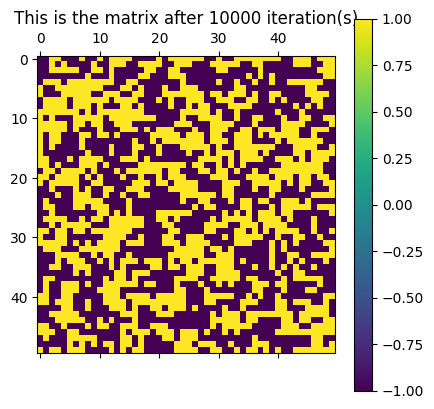

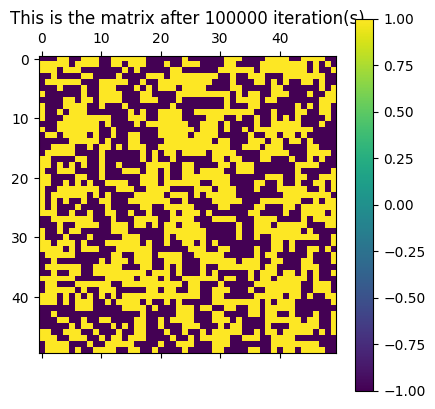

Text(0.5, 1.0, 'Magnetisation against number of iterations')

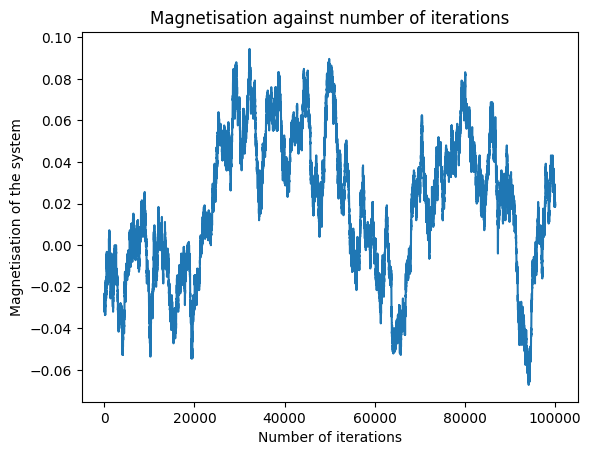

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Defining physical quantities
T = 273  # Temperature in Kelvin
beta = 1 / (1.381e-23 * T)  # Calculating beta from temperature
Magnetisation = []  # List to store magnetisation values after each iteration
numbers = [i for i in range(100001)]  # Iteration numbers for plotting
beta_J = 0.2

def energy_calc(lattice, i, j, beta_J):
    neighbors = [
        lattice[(i+1)%num_rows, j], lattice[(i-1)%num_rows, j],
        lattice[i, (j+1)%num_columns], lattice[i, (j-1)%num_columns]
    ]
    return 2 * beta_J / beta * lattice[i, j] * np.sum(neighbors)

def probability(delta_energy, T):
    return min(1, np.exp(-delta_energy * beta))

def magnetisation_calc(lattice):
    return np.sum(lattice) / (num_rows * num_columns)

def metropolis(lattice):
        i, j = random.randint(0, num_rows - 1), random.randint(0, num_columns - 1)
        delta_energy = energy_calc(lattice, i, j, beta_J)

        if delta_energy < 0 or random.random() < probability(delta_energy, T):
            lattice[i, j] = -lattice[i, j]

# Define lattice parameters for a square lattice simulation
w = 50  # Width and height of the lattice
num_rows = w
num_columns = w

# Generate an initial square lattice of random spins (1's and -1's)
lattice = np.random.choice([-1, 1], size=(num_rows, num_columns))
# Initial magnetisation calculation
Magnetisation.append(magnetisation_calc(lattice))

# Display the initial lattice configuration
plt.matshow(lattice)
plt.colorbar()
plt.title("This is the matrix after 0 iterations")
plt.show()

# Main simulation loop: Iterate the Metropolis-Hastings algorithm
for _ in range(100000):
    k = _ + 1
    metropolis(lattice)
    # Calculate and record the magnetisation after each iteration
    Magnetisation.append(magnetisation_calc(lattice))
    # Display lattice at specific logarithmic iteration intervals
    if np.log10(k) == int(np.log10(k)):
        plt.matshow(lattice)
        plt.colorbar()
        plt.title(f"This is the matrix after {k} iteration(s)")
        plt.show()

# Plot magnetisation as a function of the number of iterations
plt.plot(numbers, Magnetisation)
plt.xlabel("Number of iterations")
plt.ylabel("Magnetisation of the system")
plt.title("Magnetisation against number of iterations")

This shows that for low beta_J the average magnetisation is also low, however if you try a higher value of beta_J, there is a large average magnetisation.



Critical Temperature (T_critical): 1644.3371842123347 K


<ipython-input-29-008d3381f8c7>:39: RuntimeWarning: overflow encountered in sinh
  return (1 - np.sinh(np.abs(argument)) ** exponent) ** (1/8)


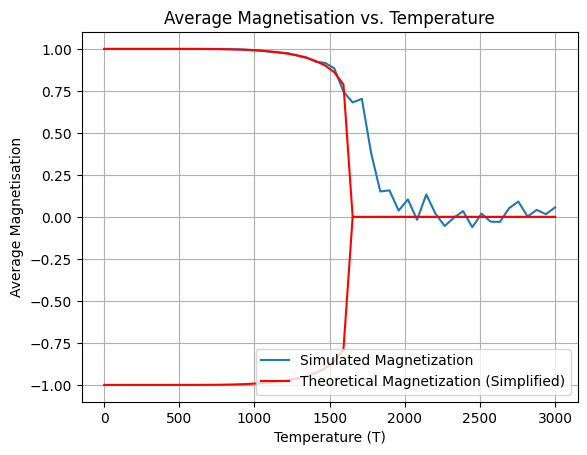

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define lattice parameters
w = 50  # w x w matrix
num_rows = w
num_columns = w

# Defining physical quantities
J = 1e-20
k_B = 1.38e-23
H = 0
T_values = np.linspace(1, 3000, 50)
average_magnetisations = []

def energy_calc(lattice, i, j):
    neighbors = [
        lattice[(i+1)%num_rows, j], lattice[(i-1)%num_rows, j],
        lattice[i, (j+1)%num_columns], lattice[i, (j-1)%num_columns]
    ]
    return 2 * J * lattice[i, j] * np.sum(neighbors)

def probability(delta_energy, T):
    return min(1, np.exp(-delta_energy / (k_B * T)))

def magnetisation_calc(lattice):
    return np.sum(lattice) / (num_rows * num_columns)

# Function to compute theoretical magnetization
def theoretical_magnetization(T, T_critical):
    # Magnetization theoretically drops to 0 above T_critical for the 2D Ising model
    if T > T_critical:
        return 0
    else:
        # Onsager solution
        argument = 2 * J / (T * k_B)
        exponent = np.where(argument != 0, -4, np.inf)
        return (1 - np.sinh(np.abs(argument)) ** exponent) ** (1/8)

def metropolis(lattice):
        i, j = random.randint(0, num_rows - 1), random.randint(0, num_columns - 1)
        delta_energy = energy_calc(lattice, i, j)

        if delta_energy < 0 or random.random() < probability(delta_energy, T):
            lattice[i, j] = -lattice[i, j]

lattice = np.random.choice([1, 1], size=(num_rows, num_columns))

T_critical = 2 * J / (np.log(1 + np.sqrt(2)) * k_B)
print("Critical Temperature (T_critical):", T_critical, "K")


for T in T_values:
    magnetisations = []
    for _ in range(100000):

        metropolis(lattice)

        if _ > 80000:
            magnetisations.append(magnetisation_calc(lattice))
    average_magnetisations.append(np.mean(magnetisations))

plt.plot(T_values, average_magnetisations, linestyle='-', label='Simulated Magnetization')
# Use the improved theoretical magnetization function
plt.plot(T_values, [theoretical_magnetization(T, T_critical) for T in T_values], color='r', linestyle='-', label="Theoretical Magnetization (Simplified)")
plt.plot(T_values, [-theoretical_magnetization(T, T_critical) for T in T_values], color ='r', linestyle='-')
plt.xlabel('Temperature (T)')
plt.ylabel('Average Magnetisation')
plt.title('Average Magnetisation vs. Temperature')
plt.legend()
plt.grid(True)
plt.show()


This shows that the theoretical solution is approximately correct, however at low tempertures it takes an extremely long time to reach stabilised magnetisation so I started the matrix as a uniform matrix instead and when the theoretical magnetisation is zero, so is the measured, however not at exactly the same time, which is slightly unusual this happends because it is difficult for the program to break up large patches of 1s or 0s, which makes it slower to equilibrate.

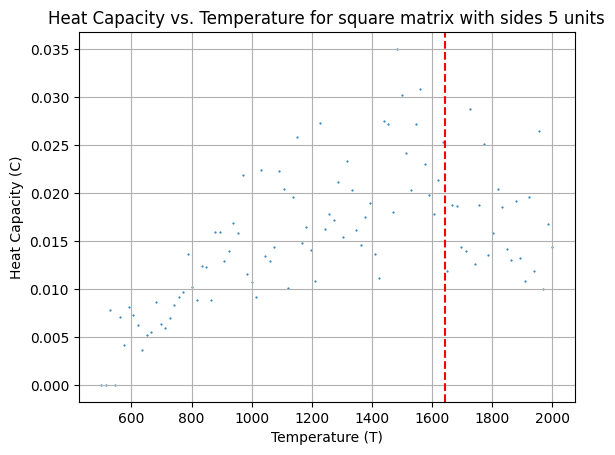

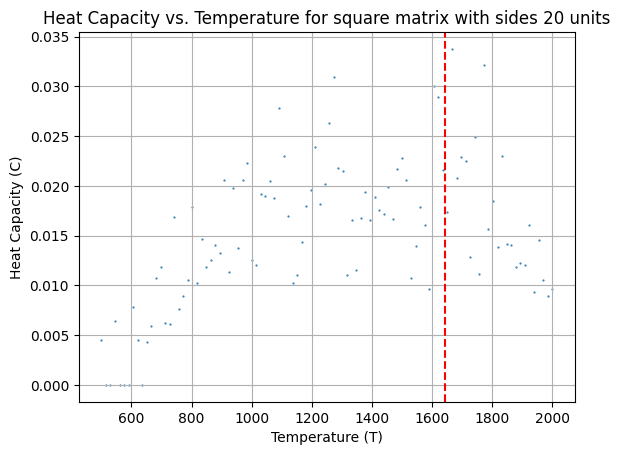

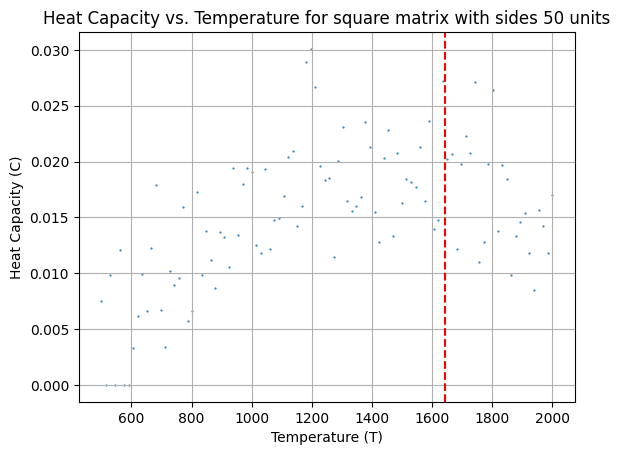

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define lattice parameters
w = 50  # w x w matrix
num_rows = w
num_columns = w

# Defining physical quantities
J = 1e-20  # Interaction energy
k_B = 1.38e-23  # Boltzmann constant
H = 0  # External magnetic field

# Function to calculate energy of the entire lattice
def total_energy(lattice):
    energy = 0
    for i in range(num_rows):
        for j in range(num_columns):
            S = lattice[i, j]
            # Periodic boundary conditions
            neighbors = lattice[(i+1)%num_rows, j] + lattice[i, (j+1)%num_columns] \
                      + lattice[(i-1)%num_rows, j] + lattice[i, (j-1)%num_columns]
            energy += -J * S * neighbors
    return energy / 4.0  # Each bond is counted twice

# Function to calculate energy change if a spin is flipped
def delta_energy(lattice, i, j):
    S = lattice[i, j]
    neighbors = lattice[(i+1)%num_rows, j] + lattice[i, (j+1)%num_columns] \
              + lattice[(i-1)%num_rows, j] + lattice[i, (j-1)%num_columns]
    return 2 * J * S * neighbors

def heat_capacity_calc(energies, heat_capacities):
    mean_E = np.mean(energies)
    mean_E2 = np.mean(np.square(energies))
    sigma_E = np.sqrt(mean_E2 - mean_E**2)
    C = sigma_E / (k_B * T**2)
    heat_capacities.append(C)

    return heat_capacities


# Define temperature values (around the critical temperature)
T_values = np.linspace(500, 2000, 100)  # Adjusted to a range around critical temperature for demonstration

# Calculating the critical temperature
T_critical = 2 * J / (np.log(1 + np.sqrt(2)) * k_B)

matrix_size = [5, 20, 50]

for m in matrix_size:
    heat_capacities = []
    # Generate square matrix of 1s
    lattice = np.random.choice([1, 1], size=(num_rows, num_columns))
    energy = total_energy(lattice)
    # Perform Metropolis-Hastings method at different temperatures
    for T in T_values:
        energies = []
        for _ in range(100000):
            i, j = random.randint(0, num_rows - 1), random.randint(0, num_columns - 1)
            E = delta_energy(lattice, i, j)
            if E < 0 or random.random() < np.exp(-E / (k_B * T)):
                lattice[i, j] *= -1
                energy += E

            if _ > 80000:
                # Store the energy every 100 iterations to reduce correlation once the system has equilibrated
                if _ % 100 == 0:
                    energies.append(energy)

        # Calculate heat capacity
        heat_capacities = heat_capacity_calc(energies, heat_capacities)


    # Plot heat capacity against temperature
    plt.scatter(T_values, heat_capacities, s=0.3)
    plt.axvline(x=T_critical, color='r', linestyle='--', label='T_critical')
    plt.xlabel('Temperature (T)')
    plt.ylabel('Heat Capacity (C)')
    plt.title(f'Heat Capacity vs. Temperature for square matrix with sides {m} units')
    plt.grid(True)
    plt.show()


The graphs don't peak exactly on the critical temperature, and as the size of the matrix increases the graphs get more scattered, so it's difficult to tell what's happening, however you can roughyl see that the peak moves further left as the size increases.